In [2]:
pip install umap-learn

In [3]:
pip install plotly

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import umap
from sklearn.manifold import TSNE

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv("haberman.data", names=['age', 'year', 'aux_nodes', 'status'])
df.head()

,age,year,aux_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        306 non-null    int64
 1   year       306 non-null    int64
 2   aux_nodes  306 non-null    int64
 3   status     306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


((306, 4), None)

In [7]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
age          0
year         0
aux_nodes    0
status       0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

features = [col for col in df.columns.values if col != 'status']

X = df[features]
y = df['status']

data = np.array(df)

X_embedded_TSNE = StandardScaler().fit_transform(
    TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(data[:, :3])
)
X_embedded_UMAP = StandardScaler().fit_transform(umap.UMAP().fit_transform(data[:, :3]))

y = data[:, 3]

X_train_TSNE, X_test_TSNE, y_train_TSNE, y_test_TSNE = train_test_split(
    X_embedded_TSNE, y, test_size=0.3, random_state=2020
)
X_train_UMAP, X_test_UMAP, y_train_UMAP, y_test_UMAP = train_test_split(
    X_embedded_UMAP, y, test_size=0.3, random_state=2020
)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



## SVM-классификатор

In [20]:
from sklearn.svm import SVC

In [21]:
clf_TSNE = SVC(kernel='linear')
clf_TSNE.fit(X_train_TSNE, y_train_TSNE)
clf_UMAP = SVC(kernel='linear')
clf_UMAP.fit(X_train_UMAP, y_train_UMAP)


SVC(kernel='linear')

In [11]:
def information(X_test,y_test, clf):
  y_pred = clf.predict(X_test)
  #доля правильных ответов алгоритма
  print("Общая точность:",metrics.accuracy_score(y_test, y_pred))
  #доля объектов названных классификатором положительными и при этом 
  #действительно являющимися положительными
  print("Precision:",metrics.precision_score(y_test, y_pred))
  #доля объектов положительного класса из всех объектов положительного
  # класса, которые нашел алгоритм
  print("Recall:",metrics.recall_score(y_test, y_pred))
  #среднее гармоническое precision и recall
  print("F-1:",metrics.f1_score(y_test, y_pred))
  report = classification_report(y_test, clf.predict(X_test), target_names=['Yes', 'No'])
  print(report)

In [37]:
def plot_SVM(X_SVM,Y,clf,text):

  plt.scatter(X_SVM[:, 0], X_SVM[:, 1], c=y, s=30, cmap=plt.cm.Paired)
  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)
  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
  # plot support vectors
  ax.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100,linewidth=1,facecolors="none",edgecolors="k",)
  plt.title(text)
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

No handles with labels found to put in legend.


TSNE
Общая точность: 0.7717391304347826
Precision: 0.7717391304347826
Recall: 1.0
F-1: 0.8711656441717791
              precision    recall  f1-score   support

         Yes       0.77      1.00      0.87        71
          No       0.00      0.00      0.00        21

    accuracy                           0.77        92
   macro avg       0.39      0.50      0.44        92
weighted avg       0.60      0.77      0.67        92



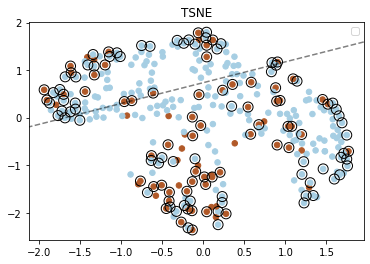

In [38]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE, clf_TSNE)
plot_SVM(X_embedded_TSNE,y,clf_TSNE,'TSNE')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

No handles with labels found to put in legend.


UMAP
Общая точность: 0.7717391304347826
Precision: 0.7717391304347826
Recall: 1.0
F-1: 0.8711656441717791
              precision    recall  f1-score   support

         Yes       0.77      1.00      0.87        71
          No       0.00      0.00      0.00        21

    accuracy                           0.77        92
   macro avg       0.39      0.50      0.44        92
weighted avg       0.60      0.77      0.67        92



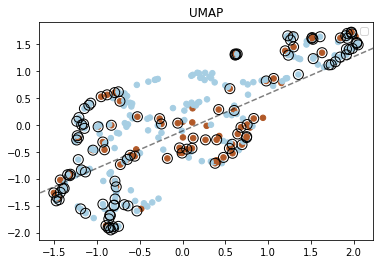

In [39]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP, clf_UMAP)
plot_SVM(X_embedded_UMAP,y,clf_UMAP,'UMAP')

Перебор по сетке

In [40]:
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], 'gamma': [100, 10,1,0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], 'gamma': [100, 10,1,0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001], 'kernel': ['rbf']},
  {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], 'gamma': [100, 10,1,0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001], 'kernel': ['sigmoid']},
 ]
gs_TSNE = GridSearchCV(clf_TSNE, param_grid)
gs_TSNE.fit(X_test_TSNE, y_test_TSNE)
gs_UMAP = GridSearchCV(clf_UMAP, param_grid)
gs_UMAP.fit(X_test_UMAP, y_test_UMAP)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                    1e-06, 1e-07, 1e-08, 1e-09],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                    1e-06, 1e-07, 1e-08, 1e-09],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                    1e-06, 1e-07, 1e-08, 1e-09],
                          'kernel': ['sigmoid']}])

In [41]:
print('TSNE')
print(gs_TSNE.best_estimator_) #лучшая модель
print('ошибка:', gs_TSNE.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_TSNE.best_params_) #гиперпараметры лучшей модели
print('UMAP')
print(gs_UMAP.best_estimator_) #лучшая модель
print('ошибка:', gs_UMAP.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_UMAP.best_params_) #гиперпараметры лучшей модели


TSNE
SVC(C=1, gamma=10)
ошибка: 0.7929824561403509
гиперпараметры: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
UMAP
SVC(C=1, gamma=10)
ошибка: 0.8152046783625732
гиперпараметры: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}


Лучшее значение

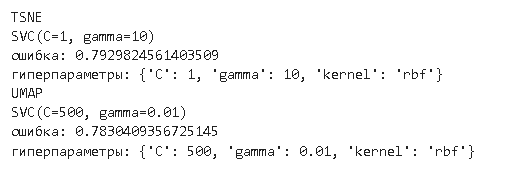

In [85]:
clf_1 = SVC(kernel='rbf', C=1, gamma=10) 
clf_1.fit(X_train_TSNE, y_train_TSNE)
clf_2 = SVC(kernel='rbf', C=500, gamma=0.01) 
clf_2.fit(X_train_UMAP, y_train_UMAP)

SVC(C=500, gamma=0.01)

TSNE
Общая точность: 0.75
Precision: 0.8
Recall: 0.9014084507042254
F-1: 0.8476821192052981
              precision    recall  f1-score   support

         Yes       0.80      0.90      0.85        71
          No       0.42      0.24      0.30        21

    accuracy                           0.75        92
   macro avg       0.61      0.57      0.58        92
weighted avg       0.71      0.75      0.72        92



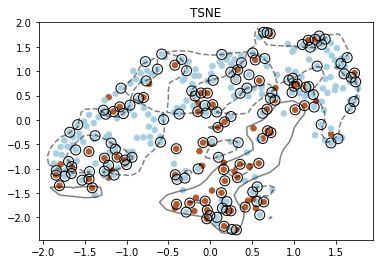

In [89]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE, clf_1)
plot_SVM(X_embedded_TSNE,y,clf_1,'TSNE')

UMAP
Общая точность: 0.7717391304347826
Precision: 0.7717391304347826
Recall: 1.0
F-1: 0.8711656441717791
              precision    recall  f1-score   support

         Yes       0.77      1.00      0.87        71
          No       0.00      0.00      0.00        21

    accuracy                           0.77        92
   macro avg       0.39      0.50      0.44        92
weighted avg       0.60      0.77      0.67        92



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



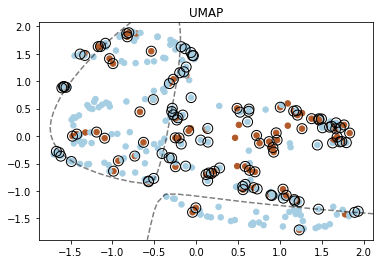

In [91]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP, clf_2)
plot_SVM(X_embedded_UMAP,y,clf_2,'UMAP')

##KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_TSNE = KNeighborsClassifier()
knn_TSNE.fit(X_train_TSNE, y_train_TSNE)
knn_UMAP = KNeighborsClassifier()
knn_UMAP.fit(X_train_UMAP, y_train_UMAP)

KNeighborsClassifier()

In [12]:
from mlxtend.plotting import plot_decision_regions

def knn_comparison(x,y,clf,text):
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(text)
  plt.show()

TSNE
Общая точность: 0.75
Precision: 0.8157894736842105
Recall: 0.8732394366197183
F-1: 0.8435374149659864
              precision    recall  f1-score   support

         Yes       0.82      0.87      0.84        71
          No       0.44      0.33      0.38        21

    accuracy                           0.75        92
   macro avg       0.63      0.60      0.61        92
weighted avg       0.73      0.75      0.74        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



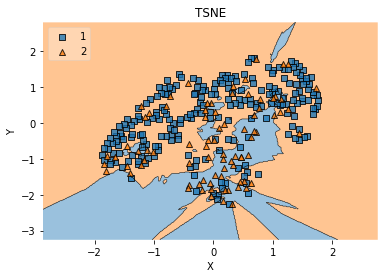

In [103]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE,knn_TSNE)
knn_comparison(X_embedded_TSNE,y,knn_TSNE,'TSNE')

UMAP
Общая точность: 0.7065217391304348
Precision: 0.7972972972972973
Recall: 0.8309859154929577
F-1: 0.8137931034482759
              precision    recall  f1-score   support

         Yes       0.80      0.83      0.81        71
          No       0.33      0.29      0.31        21

    accuracy                           0.71        92
   macro avg       0.57      0.56      0.56        92
weighted avg       0.69      0.71      0.70        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



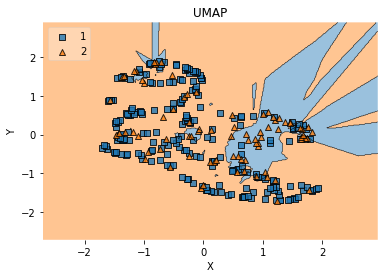

In [104]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP,knn_UMAP)
knn_comparison(X_embedded_UMAP,y,knn_UMAP,'UMAP')

In [105]:
parameters = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15], 'leaf_size': [1,2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 30, 40, 50], 'metric': ['euclidean']},
              {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15], 'leaf_size': [1,2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50], 'metric': ['manhattan']},
              {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15], 'leaf_size': [1,2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50], 'metric': ['chebyshev']},
              {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15], 'leaf_size': [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50], 'p': [1, 2, 3, 4, 5], 'metric': ['minkowski']}]
gs_1 = GridSearchCV(knn_TSNE, parameters)
gs_1.fit(X_test_TSNE, y_test_TSNE)
gs_2 = GridSearchCV(knn_UMAP, parameters)
gs_2.fit(X_test_UMAP, y_test_UMAP)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 30, 40, 50],
                          'metric': ['euclidean'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
                         {'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 20, 30, 40, 50],
                          'metric': ['manhattan'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
                         {'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 20, 30, 40, 50],
                          'metric': ['chebyshev'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
     

In [96]:
print('TSNE')
print('ошибка:', gs_1.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_1.best_params_) #гиперпараметры лучшей модели
print('UMAP')
print('ошибка:', gs_2.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_2.best_params_) #гиперпараметры лучшей модели

TSNE
ошибка: 0.8029239766081873
гиперпараметры: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 9}
UMAP
ошибка: 0.804093567251462
гиперпараметры: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 13}


Лучшие параметры

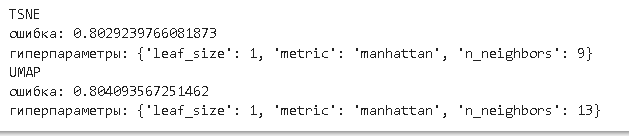

In [ ]:
knn_1 = KNeighborsClassifier(leaf_size= 1, metric='manhattan', n_neighbors=9)
knn_1.fit(X_train_TSNE, y_train_TSNE)
knn_2 = KNeighborsClassifier(leaf_size= 1, metric='manhattan', n_neighbors=13)
knn_2.fit(X_train_UMAP, y_train_UMAP)

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

TSNE
Общая точность: 0.75
Precision: 0.8157894736842105
Recall: 0.8732394366197183
F-1: 0.8435374149659864
              precision    recall  f1-score   support

         Yes       0.82      0.87      0.84        71
          No       0.44      0.33      0.38        21

    accuracy                           0.75        92
   macro avg       0.63      0.60      0.61        92
weighted avg       0.73      0.75      0.74        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



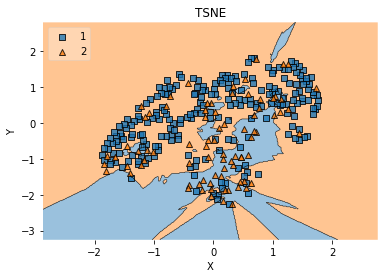

In [106]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE,knn_TSNE)
knn_comparison(X_embedded_TSNE,y,knn_TSNE,'TSNE')

UMAP
Общая точность: 0.7065217391304348
Precision: 0.7972972972972973
Recall: 0.8309859154929577
F-1: 0.8137931034482759
              precision    recall  f1-score   support

         Yes       0.80      0.83      0.81        71
          No       0.33      0.29      0.31        21

    accuracy                           0.71        92
   macro avg       0.57      0.56      0.56        92
weighted avg       0.69      0.71      0.70        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



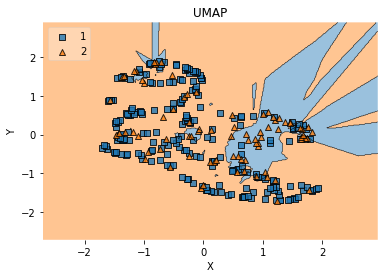

In [107]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP,knn_UMAP)
knn_comparison(X_embedded_UMAP,y,knn_UMAP,'UMAP')

##RF

In [9]:
from sklearn.ensemble import RandomForestClassifier
RF_TSNE = RandomForestClassifier()
RF_UMAP = RandomForestClassifier()
RF_TSNE.fit(X_train_TSNE, y_train_TSNE)
RF_UMAP.fit(X_train_UMAP, y_train_UMAP)

RandomForestClassifier()

TSNE
Общая точность: 0.6739130434782609
Precision: 0.7662337662337663
Recall: 0.8309859154929577
F-1: 0.7972972972972973
              precision    recall  f1-score   support

         Yes       0.77      0.83      0.80        71
          No       0.20      0.14      0.17        21

    accuracy                           0.67        92
   macro avg       0.48      0.49      0.48        92
weighted avg       0.64      0.67      0.65        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



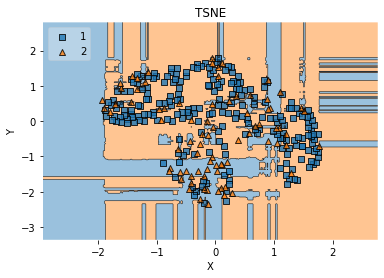

In [13]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE,RF_TSNE)
knn_comparison(X_embedded_TSNE,y,RF_TSNE,'TSNE')

UMAP
Общая точность: 0.717391304347826
Precision: 0.8
Recall: 0.8450704225352113
F-1: 0.821917808219178
              precision    recall  f1-score   support

         Yes       0.80      0.85      0.82        71
          No       0.35      0.29      0.32        21

    accuracy                           0.72        92
   macro avg       0.58      0.57      0.57        92
weighted avg       0.70      0.72      0.71        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



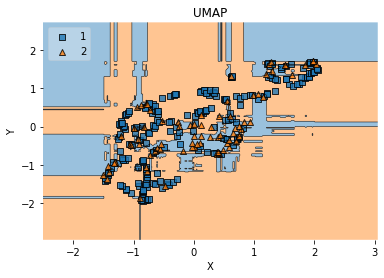

In [14]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP,RF_UMAP)
knn_comparison(X_embedded_UMAP,y,RF_UMAP,'UMAP')

In [15]:
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4],
}
gs_1 = GridSearchCV(RF_TSNE, param_grid)
gs_1.fit(X_test_TSNE, y_test_TSNE)
gs_2 = GridSearchCV(RF_UMAP, param_grid)
gs_2.fit(X_test_UMAP, y_test_UMAP)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [16]:
print('TSNE')
print('ошибка:', gs_1.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_1.best_params_) #гиперпараметры лучшей модели
print('UMAP')
print('ошибка:', gs_2.best_score_) #ошибка, полученная на лучшей модели.
print('гиперпараметры:', gs_2.best_params_) #гиперпараметры лучшей модели

TSNE
ошибка: 0.7929824561403509
гиперпараметры: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
UMAP
ошибка: 0.8140350877192983
гиперпараметры: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}


Лучшие параметры

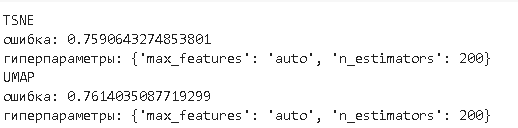

In [17]:
rf_1 = RandomForestClassifier(max_features='sqrt',min_samples_leaf=3,min_samples_split=3, n_estimators=300)
rf_1.fit(X_train_TSNE, y_train_TSNE)
rf_2 = RandomForestClassifier(max_features='sqrt',min_samples_leaf=3,min_samples_split=3, n_estimators=300)
rf_2.fit(X_train_UMAP, y_train_UMAP)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=300)

TSNE
Общая точность: 0.7391304347826086
Precision: 0.7901234567901234
Recall: 0.9014084507042254
F-1: 0.8421052631578947
              precision    recall  f1-score   support

         Yes       0.79      0.90      0.84        71
          No       0.36      0.19      0.25        21

    accuracy                           0.74        92
   macro avg       0.58      0.55      0.55        92
weighted avg       0.69      0.74      0.71        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



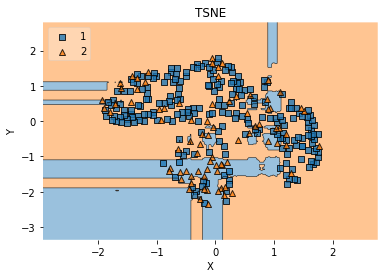

In [18]:
print('TSNE')
information(X_test_TSNE,y_test_TSNE,rf_1)
knn_comparison(X_embedded_TSNE,y,rf_1,'TSNE')

UMAP
Общая точность: 0.782608695652174
Precision: 0.8227848101265823
Recall: 0.9154929577464789
F-1: 0.8666666666666667
              precision    recall  f1-score   support

         Yes       0.82      0.92      0.87        71
          No       0.54      0.33      0.41        21

    accuracy                           0.78        92
   macro avg       0.68      0.62      0.64        92
weighted avg       0.76      0.78      0.76        92



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



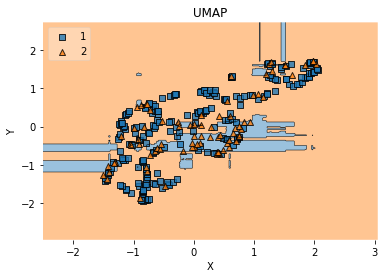

In [19]:
print('UMAP')
information(X_test_UMAP,y_test_UMAP,rf_2)
knn_comparison(X_embedded_UMAP,y,rf_2,'UMAP')